# Assignment 1 - Lorgna Lorenzo - 829776

# Richiesta
Plot a map showing the density of population of the towns  in the province of Milano, in 2014. You can use and extend  the example from class.

In [1]:
# Import libraries

import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

FIGSIZE = (10,10)

# Lettura dataset

In [2]:
# lettura dati popolazione (2011 e 2014) comuni Lombardia

tab_pop = pd.read_csv('../mod1/Lombardia_Pop2011_2014.csv',sep=',',encoding= 'unicode_escape')

tab_pop.rename(columns={'Codice':'COD_ISTATN'}, inplace=True)  # ridenominazione necessaria per successivo merge con dataset comuni
tab_pop = tab_pop.loc[tab_pop['Provincia'] == 'MILANO']  # si selezionano i dati per la sola provincia di Milano
tab_pop

# i dati riportano la popolazione, ciò che è richiesto è la densità di popolazione, quindi popolazione/area. L'area si ricava dal dataset relativo ai comuni che viene importato nelle celle a seguire

,COD_ISTATN,Comune,Cod_prov,Provincia,Pop2011,Pop2014
35,3015236,VERNATE,15,MILANO,3189.0,3321.0
102,3015222,TRIBIANO,15,MILANO,3330.0,3501.0
104,3015169,PAULLO,15,MILANO,11132.0,11334.0
110,3015042,CALVIGNASCO,15,MILANO,1196.0,1193.0
131,3015085,CORBETTA,15,MILANO,17365.0,18177.0
...,...,...,...,...,...,...
1504,3015086,CORMANO,15,MILANO,20270.0,20173.0
1505,3015157,NOVATE MILANESE,15,MILANO,20201.0,20195.0
1506,3015250,BARANZATE,15,MILANO,11448.0,11865.0
1507,3015041,BUSTO GAROLFO,15,MILANO,13513.0,13785.0


In [3]:
# lettura shapefile comuni Lombardia

shapefile = '../mod1/regione_lomb_1/Comuni_2020_poligonali.shp'  # si utilizza il seguente file a dispozione, relativo all'anno 2020

comuni = gpd.GeoDataFrame.from_file(shapefile)
comuni_milano = comuni[comuni.NOME_PRO == 'MILANO']  # si selezionano i dati per la sola provincia di Milano
comuni_milano

,CLASSREF,BELFIORE,COD_ISTATN,NOME_COM,COD_PRO,NOME_PRO,SIG_PRO,COD_CMO,NOME_CMO,COD_ASL,...,ANNO,ISTAT,LEGGE_ISTI,ATS_COD,ATS_DEC,CMETR_COD,CMETR_DEC,SHAPE_AREA,SHAPE_LEN,geometry
1,560529b7-af1e-4dee-a47b-8dd8541bc6b6,D367,03015101,DRESANO,15,MILANO,MI,None,None,10,...,0,15101,None,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,001,CITTA' METROPOLITANA DI MILANO,3.505868e+06,9639.637073,"POLYGON ((527474.560 5024855.804, 527522.560 5..."
6,b8e130e3-27c4-4d8e-8150-9d4033f3968d,F939,03015155,NOSATE,15,MILANO,MI,None,None,9,...,0,15155,None,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,001,CITTA' METROPOLITANA DI MILANO,4.923317e+06,10882.729418,"POLYGON ((477387.977 5043229.079, 477367.102 5..."
27,bffbe2c0-3c38-448f-8727-ac65c0a1e62b,C565,03015074,CESANO BOSCONE,15,MILANO,MI,None,None,9,...,0,15074,None,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,001,CITTA' METROPOLITANA DI MILANO,3.968097e+06,13732.359584,"POLYGON ((505892.397 5030623.348, 505871.397 5..."
29,12b046b2-595d-457e-aae7-146d4ae1b187,I361,03015200,SANTO STEFANO TICINO,15,MILANO,MI,None,None,9,...,0,15200,None,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,001,CITTA' METROPOLITANA DI MILANO,5.029254e+06,13713.349991,"POLYGON ((491591.146 5037520.980, 491622.770 5..."
36,e16e79e2-a44e-418e-8fdd-556d03a2636e,B240,03015036,BUCCINASCO,15,MILANO,MI,None,None,9,...,0,15036,None,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,001,CITTA' METROPOLITANA DI MILANO,1.199857e+07,27089.543783,"POLYGON ((506778.868 5029702.921, 506781.303 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,bb11d32a-8905-4929-af5d-b017424b1cf4,I415,03015202,SAN ZENONE AL LAMBRO,15,MILANO,MI,None,None,10,...,0,15202,None,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,001,CITTA' METROPOLITANA DI MILANO,7.246165e+06,20966.223118,"POLYGON ((530259.530 5017081.445, 530253.279 5..."
1460,b6088ec4-f10b-447d-8160-66048242bfd0,H803,03015191,SAN COLOMBANO AL LAMBRO,15,MILANO,MI,None,None,6,...,0,15191,None,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,001,CITTA' METROPOLITANA DI MILANO,1.657445e+07,28572.596552,"POLYGON ((541803.470 5001429.362, 541770.734 5..."
1481,a7cc231a-c770-4a18-8097-c0779f700aa3,I577,03015205,SEGRATE,15,MILANO,MI,None,None,10,...,0,15205,None,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,001,CITTA' METROPOLITANA DI MILANO,1.730485e+07,27156.910466,"POLYGON ((521289.675 5034309.649, 521284.575 5..."
1485,23b5ee2e-bbae-4c93-833c-dea79add4365,I690,03015209,SESTO SAN GIOVANNI,15,MILANO,MI,None,None,8,...,0,15209,http://www.cartografia.regione.lombardia.it/me...,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,001,CITTA' METROPOLITANA DI MILANO,1.176890e+07,21720.086973,"POLYGON ((521208.165 5044838.643, 521206.665 5..."


<AxesSubplot:>

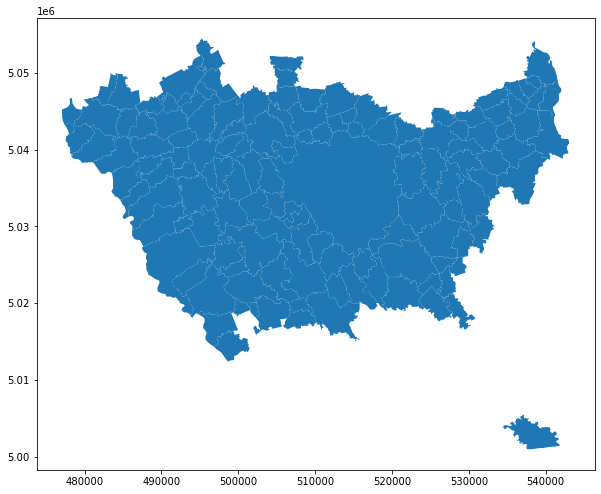

In [4]:
# viene mostrata la mappa della provincia di Milano con evidenziati i confini comunali

comuni_milano.plot(figsize = FIGSIZE)

# Calcolo nuova feature Density

In [5]:
# si effettua il join tra i due dataset

tab_pop.COD_ISTATN = tab_pop.COD_ISTATN.astype(int)
comuni_milano.COD_ISTATN = comuni_milano.COD_ISTATN.astype(int)
comuni_milano = comuni_milano.merge(tab_pop, on='COD_ISTATN')
comuni_milano

# quello che serve sarà: nome_com - polygon - pop2014

D:\Anaconda\envs\env_environment_lab\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,CLASSREF,BELFIORE,COD_ISTATN,NOME_COM,COD_PRO,NOME_PRO,SIG_PRO,COD_CMO,NOME_CMO,COD_ASL,...,CMETR_COD,CMETR_DEC,SHAPE_AREA,SHAPE_LEN,geometry,Comune,Cod_prov,Provincia,Pop2011,Pop2014
0,560529b7-af1e-4dee-a47b-8dd8541bc6b6,D367,3015101,DRESANO,15,MILANO,MI,None,None,10,...,001,CITTA' METROPOLITANA DI MILANO,3.505868e+06,9639.637073,"POLYGON ((527474.560 5024855.804, 527522.560 5...",DRESANO,15,MILANO,2992.0,3085.0
1,b8e130e3-27c4-4d8e-8150-9d4033f3968d,F939,3015155,NOSATE,15,MILANO,MI,None,None,9,...,001,CITTA' METROPOLITANA DI MILANO,4.923317e+06,10882.729418,"POLYGON ((477387.977 5043229.079, 477367.102 5...",NOSATE,15,MILANO,689.0,684.0
2,bffbe2c0-3c38-448f-8727-ac65c0a1e62b,C565,3015074,CESANO BOSCONE,15,MILANO,MI,None,None,9,...,001,CITTA' METROPOLITANA DI MILANO,3.968097e+06,13732.359584,"POLYGON ((505892.397 5030623.348, 505871.397 5...",CESANO BOSCONE,15,MILANO,23935.0,23535.0
3,12b046b2-595d-457e-aae7-146d4ae1b187,I361,3015200,SANTO STEFANO TICINO,15,MILANO,MI,None,None,9,...,001,CITTA' METROPOLITANA DI MILANO,5.029254e+06,13713.349991,"POLYGON ((491591.146 5037520.980, 491622.770 5...",SANTO STEFANO TICINO,15,MILANO,4731.0,5013.0
4,e16e79e2-a44e-418e-8fdd-556d03a2636e,B240,3015036,BUCCINASCO,15,MILANO,MI,None,None,9,...,001,CITTA' METROPOLITANA DI MILANO,1.199857e+07,27089.543783,"POLYGON ((506778.868 5029702.921, 506781.303 5...",BUCCINASCO,15,MILANO,26937.0,27123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,bb11d32a-8905-4929-af5d-b017424b1cf4,I415,3015202,SAN ZENONE AL LAMBRO,15,MILANO,MI,None,None,10,...,001,CITTA' METROPOLITANA DI MILANO,7.246165e+06,20966.223118,"POLYGON ((530259.530 5017081.445, 530253.279 5...",SAN ZENONE AL LAMBRO,15,MILANO,4193.0,4335.0
128,b6088ec4-f10b-447d-8160-66048242bfd0,H803,3015191,SAN COLOMBANO AL LAMBRO,15,MILANO,MI,None,None,6,...,001,CITTA' METROPOLITANA DI MILANO,1.657445e+07,28572.596552,"POLYGON ((541803.470 5001429.362, 541770.734 5...",SAN COLOMBANO AL LAMBRO,15,MILANO,7468.0,7399.0
129,a7cc231a-c770-4a18-8097-c0779f700aa3,I577,3015205,SEGRATE,15,MILANO,MI,None,None,10,...,001,CITTA' METROPOLITANA DI MILANO,1.730485e+07,27156.910466,"POLYGON ((521289.675 5034309.649, 521284.575 5...",SEGRATE,15,MILANO,34352.0,34908.0
130,23b5ee2e-bbae-4c93-833c-dea79add4365,I690,3015209,SESTO SAN GIOVANNI,15,MILANO,MI,None,None,8,...,001,CITTA' METROPOLITANA DI MILANO,1.176890e+07,21720.086973,"POLYGON ((521208.165 5044838.643, 521206.665 5...",SESTO SAN GIOVANNI,15,MILANO,81130.0,81490.0


In [6]:
# viene calcolata la nuova feature densità = popolazione / area

comuni_milano['Density2014'] = comuni_milano['Pop2014']/(comuni_milano['geometry'].area/(10**6))
comuni_milano

,CLASSREF,BELFIORE,COD_ISTATN,NOME_COM,COD_PRO,NOME_PRO,SIG_PRO,COD_CMO,NOME_CMO,COD_ASL,...,CMETR_DEC,SHAPE_AREA,SHAPE_LEN,geometry,Comune,Cod_prov,Provincia,Pop2011,Pop2014,Density2014
0,560529b7-af1e-4dee-a47b-8dd8541bc6b6,D367,3015101,DRESANO,15,MILANO,MI,None,None,10,...,CITTA' METROPOLITANA DI MILANO,3.505868e+06,9639.637073,"POLYGON ((527474.560 5024855.804, 527522.560 5...",DRESANO,15,MILANO,2992.0,3085.0,879.953392
1,b8e130e3-27c4-4d8e-8150-9d4033f3968d,F939,3015155,NOSATE,15,MILANO,MI,None,None,9,...,CITTA' METROPOLITANA DI MILANO,4.923317e+06,10882.729418,"POLYGON ((477387.977 5043229.079, 477367.102 5...",NOSATE,15,MILANO,689.0,684.0,138.930728
2,bffbe2c0-3c38-448f-8727-ac65c0a1e62b,C565,3015074,CESANO BOSCONE,15,MILANO,MI,None,None,9,...,CITTA' METROPOLITANA DI MILANO,3.968097e+06,13732.359584,"POLYGON ((505892.397 5030623.348, 505871.397 5...",CESANO BOSCONE,15,MILANO,23935.0,23535.0,5931.054445
3,12b046b2-595d-457e-aae7-146d4ae1b187,I361,3015200,SANTO STEFANO TICINO,15,MILANO,MI,None,None,9,...,CITTA' METROPOLITANA DI MILANO,5.029254e+06,13713.349991,"POLYGON ((491591.146 5037520.980, 491622.770 5...",SANTO STEFANO TICINO,15,MILANO,4731.0,5013.0,996.768084
4,e16e79e2-a44e-418e-8fdd-556d03a2636e,B240,3015036,BUCCINASCO,15,MILANO,MI,None,None,9,...,CITTA' METROPOLITANA DI MILANO,1.199857e+07,27089.543783,"POLYGON ((506778.868 5029702.921, 506781.303 5...",BUCCINASCO,15,MILANO,26937.0,27123.0,2260.520136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,bb11d32a-8905-4929-af5d-b017424b1cf4,I415,3015202,SAN ZENONE AL LAMBRO,15,MILANO,MI,None,None,10,...,CITTA' METROPOLITANA DI MILANO,7.246165e+06,20966.223118,"POLYGON ((530259.530 5017081.445, 530253.279 5...",SAN ZENONE AL LAMBRO,15,MILANO,4193.0,4335.0,598.247525
128,b6088ec4-f10b-447d-8160-66048242bfd0,H803,3015191,SAN COLOMBANO AL LAMBRO,15,MILANO,MI,None,None,6,...,CITTA' METROPOLITANA DI MILANO,1.657445e+07,28572.596552,"POLYGON ((541803.470 5001429.362, 541770.734 5...",SAN COLOMBANO AL LAMBRO,15,MILANO,7468.0,7399.0,446.409963
129,a7cc231a-c770-4a18-8097-c0779f700aa3,I577,3015205,SEGRATE,15,MILANO,MI,None,None,10,...,CITTA' METROPOLITANA DI MILANO,1.730485e+07,27156.910466,"POLYGON ((521289.675 5034309.649, 521284.575 5...",SEGRATE,15,MILANO,34352.0,34908.0,2017.237881
130,23b5ee2e-bbae-4c93-833c-dea79add4365,I690,3015209,SESTO SAN GIOVANNI,15,MILANO,MI,None,None,8,...,CITTA' METROPOLITANA DI MILANO,1.176890e+07,21720.086973,"POLYGON ((521208.165 5044838.643, 521206.665 5...",SESTO SAN GIOVANNI,15,MILANO,81130.0,81490.0,6924.181519


# Mappa che mostra la densità di popolazione delle città in provincia di Milano, nel 2014

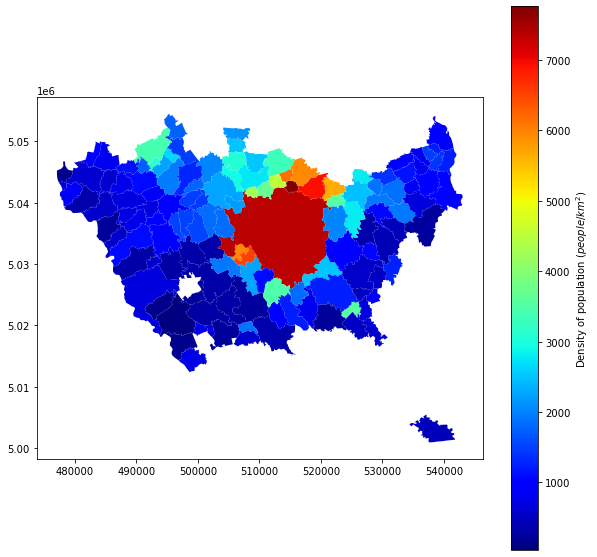

In [8]:
comuni_milano.plot(column=comuni_milano['Density2014'],
                   figsize = FIGSIZE,
                   cmap='jet',
                   legend=True,
                   legend_kwds={'label': 'Density of population ($people/km^2$)'})
# plt.title='Densità di popolazione delle città in Provincia di Milano, 2014'
plt.show()